<font size=7>LFP Animations

<font color="red">

**To Do**
* run filtes on data, see if graphs look different

# <font color="grey"> Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt

# Ash's animation imports
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
import math

# My imports
import pickle
from human_hip.basics import read_phy_files
from human_hip.lfp import butter_filter, get_brain_waves
import  braingeneers.data.datasets_electrophysiology as ephys

# <font color="orange"> DG Biculline Animation

## <font color="orange"> Get Data

load raw data

In [181]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [182]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

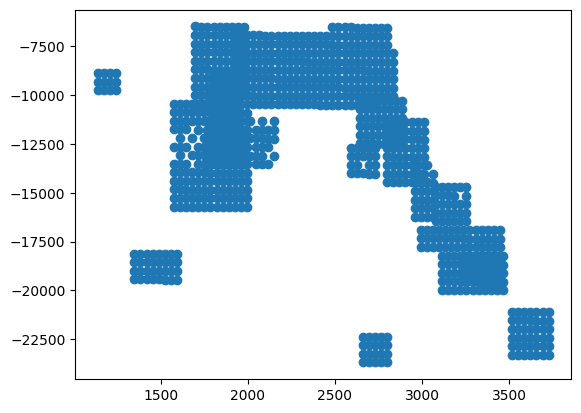

In [183]:
# plot electrode layout
plt.scatter( x , y )

(2000.0, 3000.0)

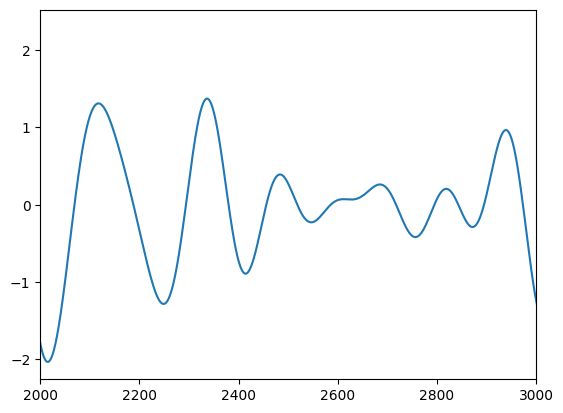

In [184]:
# plot scatter of one wave from data
plt.plot( [*range(len(waves["delta"][1,:]))], waves["theta"][20,:] )
plt.xlim(2000,3000)

## <font color="orange"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

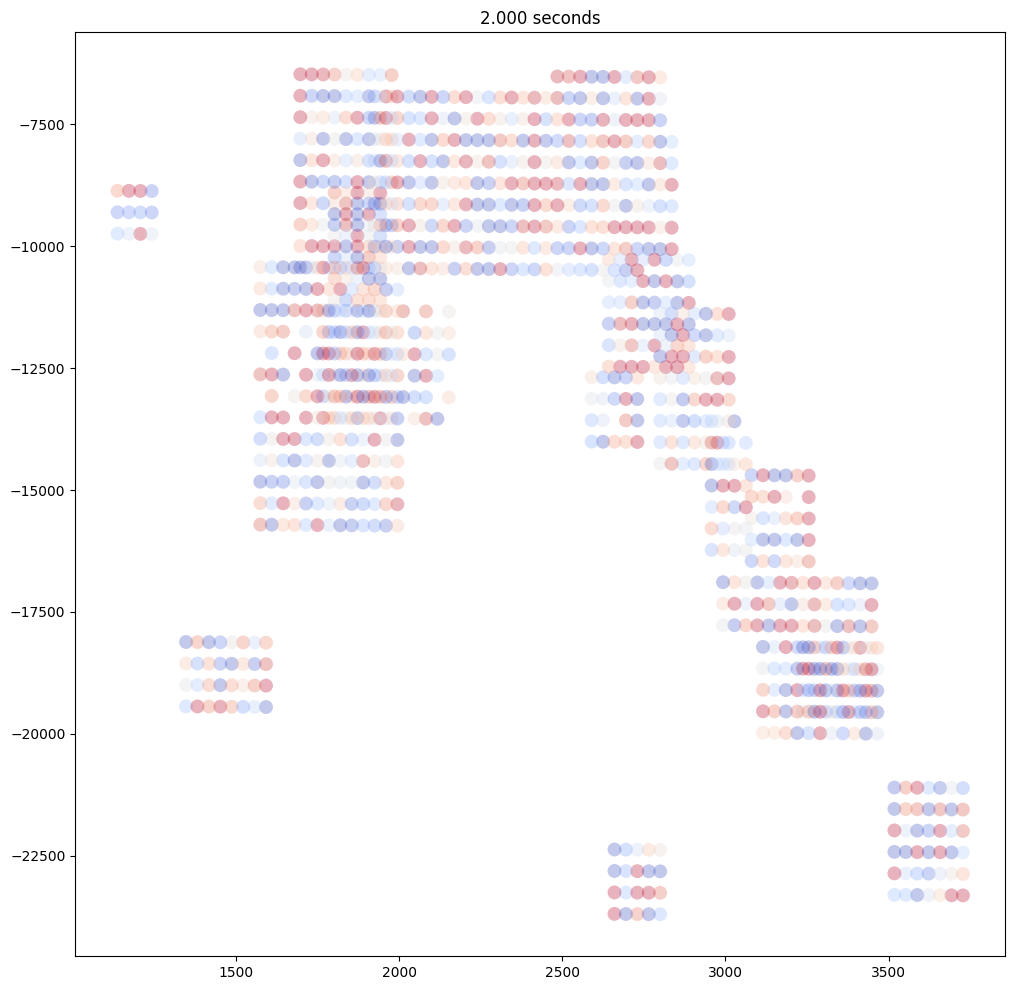

In [135]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["delta"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 4000, 14), interval=100, blit=False)

In [136]:
anim.save("checkit3.mp4")

## <font color="brown"> Heatmap

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["delta"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 4000, 14), interval=100, blit=False)

### <font color="brown"> Example

[website here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)

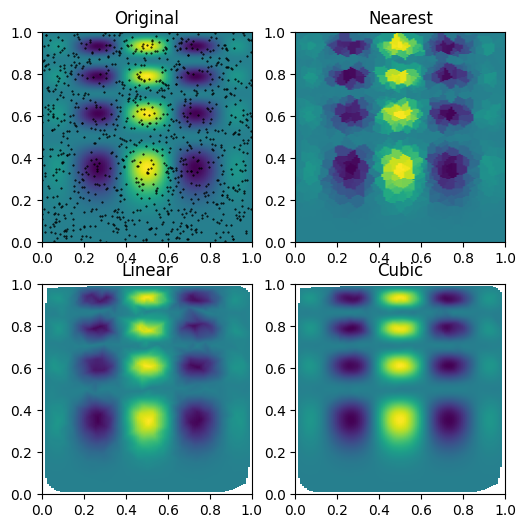

In [187]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

### <font color="brown"> Try 1

In [217]:

values = data_pkl["data"][:,0]

In [234]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
points = np.array( [x,y] ).T   #points= data_pkl["xy"]

grid_x, grid_y = np.mgrid[ math.floor(min(x)):math.ceil(max(x)):10 , math.floor(min(y)):math.ceil(max(y)):10 ]
#grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [241]:
grid_z2 = griddata(points, values, (grid_x, grid_y), method="nearest") #"linear" #"nearest")#'cubic')


Text(0.5, 1.0, 'Cubic')

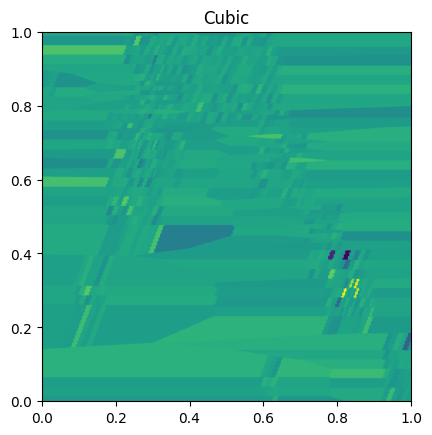

In [243]:
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

In [ ]:
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

# <font color="magenta"> DG No-Bicuculine Animation

## <font color="magenta"> Get Data

load data

In [139]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start325s_stop335s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [140]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

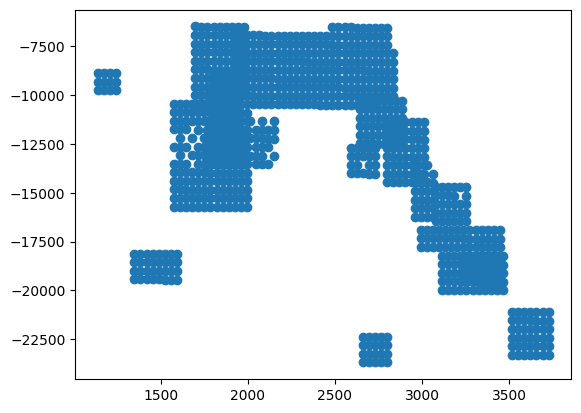

In [141]:
# plot electrode layout
plt.scatter( x , y )

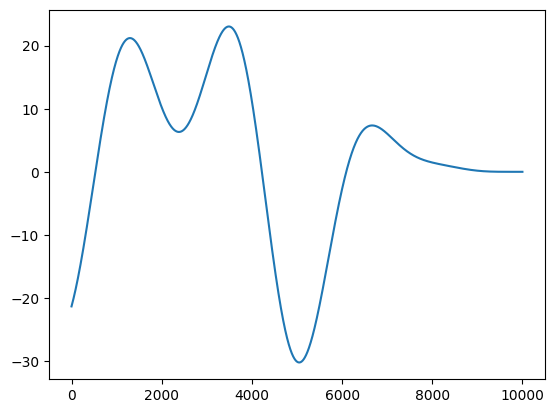

In [172]:
# plot scatter of one wave from data
plt.plot( [*range(waves["basic"].shape[1])], waves["low"][990,:] )
#plt.xlim(2000,3000)

## <font color="magenta"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

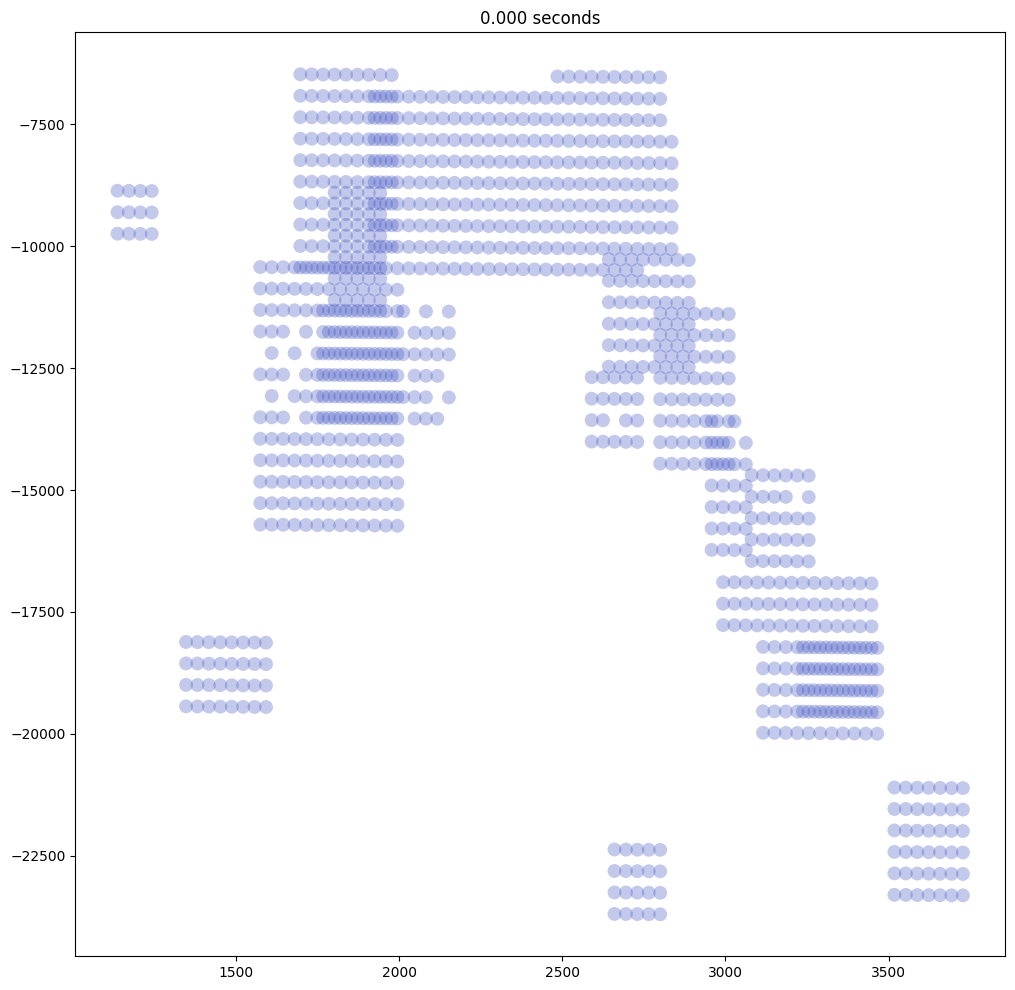

In [179]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["low"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(0000, 6000, 50), interval=100, blit=False)

In [180]:
anim.save("checkit4.mp4")

# <font color="blue"> CA1 Animation

## <font color="blue"> Get Data

load data

In [2]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start0s_stop20s_downsampled40frames.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [3]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

basic plots

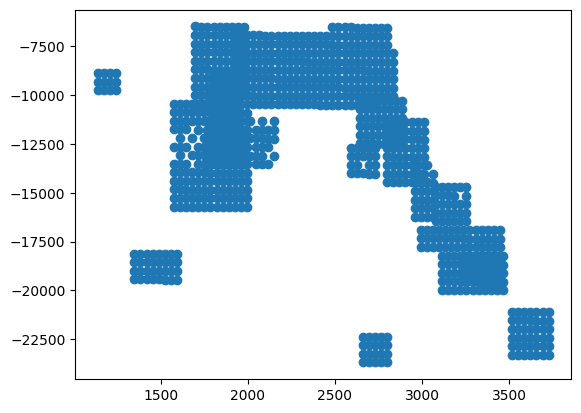

In [ ]:
# plot electrode layout
plt.scatter( x , y )

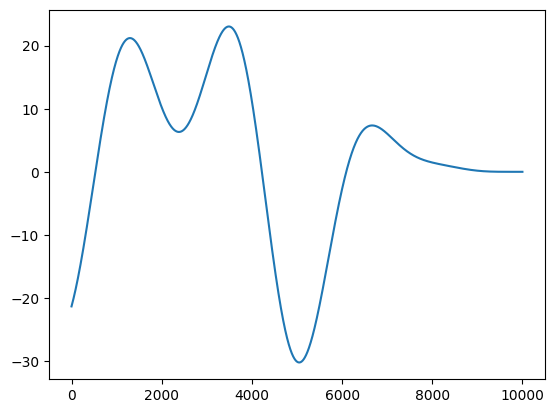

In [ ]:
# plot scatter of one wave from data
plt.plot( [*range(waves["basic"].shape[1])], waves["low"][990,:] )
#plt.xlim(2000,3000)

## <font color="blue"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

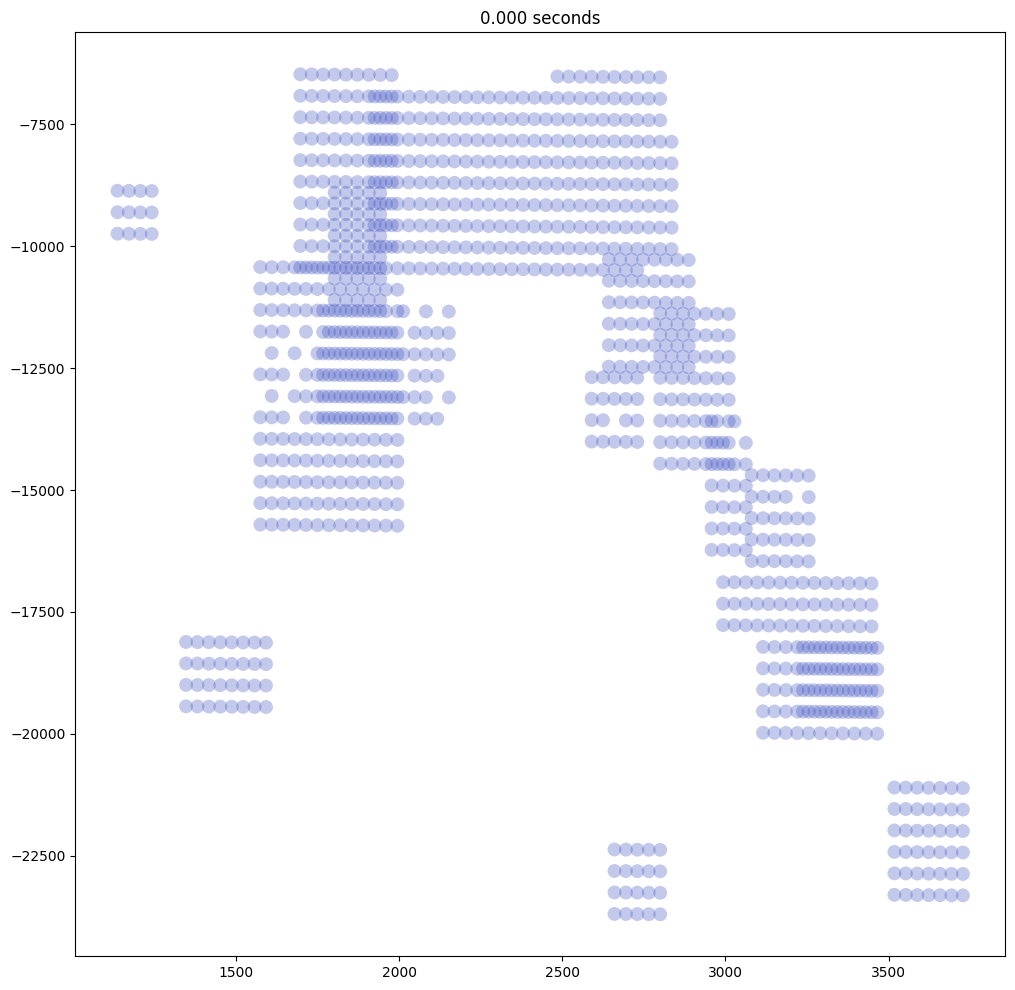

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["low"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(0000, 6000, 50), interval=100, blit=False)

In [ ]:
anim.save("checkit4.mp4")